In [4]:
%load_ext autoreload
%autoreload 2

import igraph as ig
from igraph import Graph
from tests.test_environment import *
#from environments.config.environment_presets import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import networkx as nx
import scipy as sp

#from environments.road_env import RoadEnvironment
#from environments.shock import Shock

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [183]:
env = EnvironmentLoader("environments/config/environment_presets/small_environment.yaml").to_numpy()

shocks <environments.shock.Shock object at 0x0000015B5E9BA3B0>
shocks <environments.shock.Shock object at 0x0000015B5E9BA3B0>
shocks <environments.shock.Shock object at 0x0000015B5E9BA3B0>
shocks <environments.shock.Shock object at 0x0000015B5E9BA3B0>
[[0.1 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.1]]
6.070964943473935
0.441 0.527 -0.778 5.57


pgas 0.42406249389866074
shock tables [array([[0.10802088, 0.42893222, 0.3432101 , 0.1198368 ],
       [0.        , 0.10802088, 0.65815161, 0.23382751],
       [0.        , 0.        , 0.10802088, 0.89197912]])]
[[0.1 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.1]]
6.070964943473935
0.441 0.527 -0.778 5.57


pgas 0.42102442019162106
shock tables [array([[0.10969807, 0.43171524, 0.34098025, 0.11760644],
       [0.        , 0.10969807, 0.65990314, 0.23039879],
       [0.        , 0.        , 0.10969807, 0.89030193]])]
[[0.1 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.1]]
6.070964943473935
0.441 0.527 -0.778 5.57


pgas 0.42193508100562793
shock tables [array([[0.10919

In [188]:
env.reset()
print(env.shocks.times, env.shocks.magni, env.shocks.locs)



pgas [0.50563733 0.24850345]
shock tables [array([[0.07202005, 0.35571485, 0.38844398, 0.18382113],
       [0.        , 0.07202005, 0.60212763, 0.32585232],
       [0.        , 0.        , 0.07202005, 0.92797995]]), array([[0.27156   , 0.55168387, 0.15458498, 0.02217114],
       [0.        , 0.27156   , 0.66921792, 0.05922208],
       [0.        , 0.        , 0.27156   , 0.72844   ]])]


pgas [0.50415521 0.246863  ]
shock tables [array([[0.072542  , 0.35699338, 0.38786045, 0.18260418],
       [0.        , 0.072542  , 0.60325656, 0.32420145],
       [0.        , 0.        , 0.072542  , 0.927458  ]]), array([[0.2739706 , 0.55194495, 0.15245436, 0.02163008],
       [0.        , 0.2739706 , 0.66801773, 0.05801167],
       [0.        , 0.        , 0.2739706 , 0.7260294 ]])]


pgas [0.50514145 0.24515285]
shock tables [array([[0.07219422, 0.35614233, 0.38824966, 0.1834138 ],
       [0.        , 0.07219422, 0.60250565, 0.32530013],
       [0.        , 0.        , 0.07219422, 0.92780578]]), 

In [190]:
print(env.shocks.times, env.shocks.magni, env.shocks.locs)

[20 50] [6.40804688 5.05981723] [[ 0.3308896   0.52454204]
 [-0.15857552 -0.00142751]]


In [136]:
for edge in env.graph.es():
    s = edge["road_segments"].segments[0]
    break
s

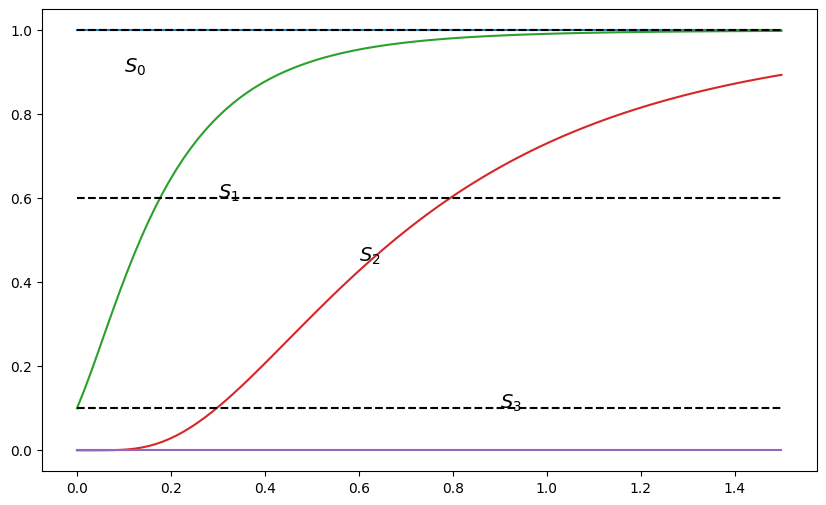

In [171]:
level = 1
x = np.linspace(1e-10,1.5,100)
y = np.zeros((len(x), 5))
y[:,0] = 1

shift_table = np.array([[0.1, 0, 0], [0.0, 0.1, 0], [0, 0, 0.1]])

plt.figure(figsize=(10,6))
for i, k in enumerate(x):
    f = env.shocks.get_fragilities(pga=k, theta_mat=env.shocks.fragility_dict["theta_mat"], sigma=0.64, shift=shift_table)
    for m in range(1,4):
        y[i,m] = f[level,m-1] if f[level,m-1] is not np.nan else 1
for j in range(y.shape[1]):
    plt.plot(x, y[:,j])

plt.text(x=0.1, y=0.9, s=r"$S_0$", fontsize=14)
plt.text(x=0.3, y=0.6, s=r"$S_1$", fontsize=14)
plt.text(x=0.6, y=0.45, s=r"$S_2$", fontsize=14)
plt.text(x=0.9, y=0.1, s=r"$S_3$", fontsize=14)
plt.hlines(y=1, xmin=np.min(x), xmax=np.max(x), linestyles='dashed', color='k')
plt.hlines(y=0.1, xmin=np.min(x), xmax=np.max(x), linestyles='dashed', color='k')
plt.hlines(y=0.6, xmin=np.min(x), xmax=np.max(x), linestyles='dashed', color='k')
plt.show()

In [175]:
f = env.shocks.get_fragilities(pga=0.00, theta_mat=env.shocks.fragility_dict["theta_mat"], sigma=0.64, shift=shift_table)

c:\Users\danie\Documents\Daniel\Uni\Dring\DRL\IMP-RL-Challenge\imp-rl-challenge\environments\shock.py:151: RuntimeWarning: divide by zero encountered in log
  print(type(theta_mat), theta_mat)


In [176]:
np.exp(sp.stats.norm.ppf(0))

0.0

In [174]:
env.shocks.get_det_probs_from_fragility_matrix(frag_mat=f)

array([[8.97393089e-01, 1.02606911e-01, 6.75950750e-22, 1.09523800e-26],
       [0.00000000e+00, 8.97393089e-01, 1.02606911e-01, 1.22737285e-24],
       [0.00000000e+00, 0.00000000e+00, 8.97393089e-01, 1.02606911e-01]])

In [31]:
env = EnvironmentLoader("environments/config/environment_presets/large_environment.yaml").to_numpy()

here
shock coordinates {'x_min': 1.8886900843999999, 'x_max': 6.897450152599999, 'y_min': 49.17067839, 'y_max': 51.833712330000004}
c:\Users\danie\Documents\Daniel\Uni\Dring\DRL\IMP-RL-Challenge\imp-rl-challenge


In [71]:
env.reset()
print(env.shocks.times, env.shocks.magni)

[ 2 14] [6.36020367 5.55433896]


In [72]:
env.shocks

In [73]:
for edge in env.graph.es():
    print(edge["road_segments"].shocks)

None
None
None
None


In [64]:
for edge in env.graph.es():
    for s in edge["road_segments"].segments:
        #print(s.pgas, s.fragilities)
        print(s.shocks)

None
None
None
None
None
None
None
None


In [37]:
env.shocks.theta_mat

array([['0.24', '0.45', '0.9'],
       ['None', '0.24', '0.675'],
       ['None', 'None', '0.24']], dtype='<U32')

In [17]:
env.shocks.reset()

TypeError: Shock.get_shock_location() got an unexpected keyword argument 'dynamic'

In [28]:
env.graph.es[0]['road_segments'].segments[0].position_y

0.33

In [4]:
E.edge_segments_numbers

[2, 2, 2, 2]

In [77]:
dt = E.graph.es['road_segments'][0].segments[0].deterioration_table

In [202]:
S = Shock(lambda_t=1/5, lambda_m=np.log(20)/5, max_timesteps=50)
print(S.times, S.magnits)

[13 17] [5.27119251 6.07218669]


In [237]:
E = RoadEnvironment(**small_environment_dict)
actions = [[1,1] for _ in range(len(E.edge_segments_numbers))]
timestep = 0
done = False

while not done:
    timestep += 1
    obs, cost, done, info = E.step(actions)

In shock [33] 33 [10.9398719]
0 0 0
10.93987189859567
[[1, 1], [1, 1], [1, 1], [1, 1]]
1
[[[0.9 0.1 0.  0. ]
  [0.  0.9 0.1 0. ]
  [0.  0.  0.9 0.1]
  [0.  0.  0.  1. ]]

 [[0.9 0.1 0.  0. ]
  [0.  0.9 0.1 0. ]
  [0.  0.  0.9 0.1]
  [0.  0.  0.  1. ]]

 [[1.  0.  0.  0. ]
  [0.9 0.1 0.  0. ]
  [0.8 0.2 0.  0. ]
  [0.7 0.2 0.1 0. ]]

 [[1.  0.  0.  0. ]
  [1.  0.  0.  0. ]
  [1.  0.  0.  0. ]
  [1.  0.  0.  0. ]]]
[[0.9 0.1 0.  0. ]
 [0.  0.9 0.1 0. ]
 [0.  0.  0.9 0.1]
 [0.  0.  0.  1. ]]
0 1 0
10.93987189859567
[[1, 1], [1, 1], [1, 1], [1, 1]]
1
[[[0.9 0.1 0.  0. ]
  [0.  0.9 0.1 0. ]
  [0.  0.  0.9 0.1]
  [0.  0.  0.  1. ]]

 [[0.9 0.1 0.  0. ]
  [0.  0.9 0.1 0. ]
  [0.  0.  0.9 0.1]
  [0.  0.  0.  1. ]]

 [[1.  0.  0.  0. ]
  [0.9 0.1 0.  0. ]
  [0.8 0.2 0.  0. ]
  [0.7 0.2 0.1 0. ]]

 [[1.  0.  0.  0. ]
  [1.  0.  0.  0. ]
  [1.  0.  0.  0. ]
  [1.  0.  0.  0. ]]]
[[0.9 0.1 0.  0. ]
 [0.  0.9 0.1 0. ]
 [0.  0.  0.9 0.1]
 [0.  0.  0.  1. ]]
1 0 0
10.93987189859567
[[1, 1], [1, 1], [

5
0.441 0.527 -0.778 5.57
6
0.441 0.527 -0.778 5.57
7
0.441 0.527 -0.778 5.57
8
0.441 0.527 -0.778 5.57


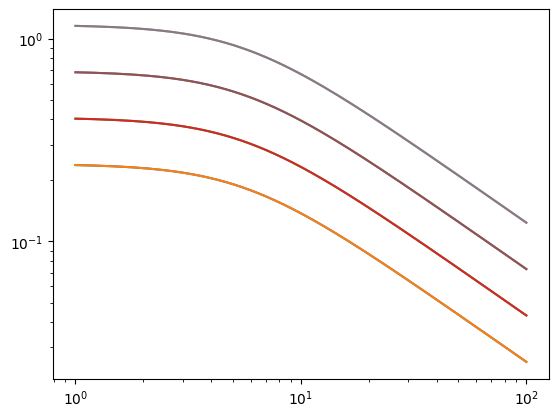

In [103]:
r = np.linspace(1,100,1000)
b1_hat = 0.441
b2 = 0.527
b3 = 0.0
b5 = -0.778
h = 5.57
pga = lambda m, r: b1_hat + b2*(m-6) + b3*(m-6)**2 + b5*np.log(np.sqrt(r**2 + h**2))

for k in range(5,9):
    plt.plot(r, env.shocks.get_pga_from_distance(magn=k, dist=r, **env.shocks.pga_dict))
    plt.plot(r, np.exp(pga(m=k, r=r)), label=f'm={k}')
plt.yscale('log')
plt.xscale('log')

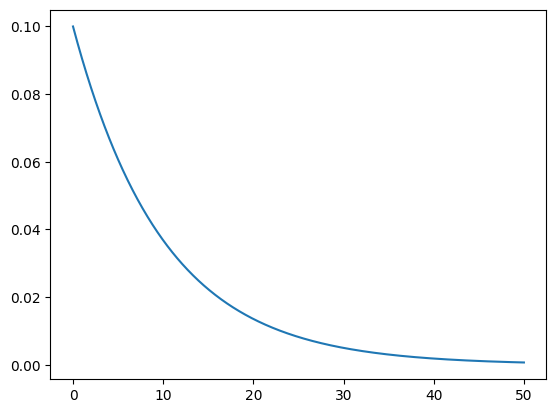

In [68]:
t = np.linspace(0,50,1000)
plt.plot(t, sp.stats.expon.pdf(t, loc=0, scale=10))

(array([2.504e+03, 1.840e+03, 1.421e+03, 1.065e+03, 8.130e+02, 6.120e+02,
        4.500e+02, 3.070e+02, 2.390e+02, 1.930e+02, 1.410e+02, 9.000e+01,
        7.000e+01, 6.000e+01, 5.300e+01, 4.000e+01, 2.500e+01, 1.600e+01,
        1.500e+01, 1.500e+01, 6.000e+00, 7.000e+00, 7.000e+00, 4.000e+00,
        0.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([6.51744918e-04, 1.44187784e+00, 2.88310393e+00, 4.32433002e+00,
        5.76555611e+00, 7.20678220e+00, 8.64800829e+00, 1.00892344e+01,
        1.15304605e+01, 1.29716866e+01, 1.44129126e+01, 1.58541387e+01,
        1.72953648e+01, 1.87365909e+01, 2.01778170e+01, 2.16190431e+01,
        2.30602692e+01, 2.45014953e+01, 2.59427214e+01, 2.73839475e+01,
        2.88251736e+01, 3.02663996e+01, 3.17076257e+01, 3.31488518e+01,
        3.45900779e+01, 3.60313040e+01, 3.74725301e+01, 3.89137562e+01,
        4.03549823e+01, 4.17962084e+01, 4.32374345e+01]),
 <BarContainer object of 30 artists>)

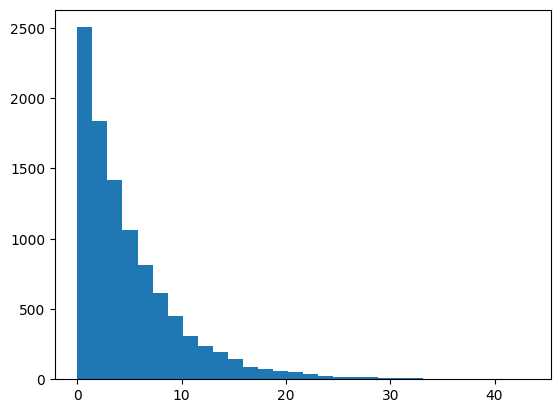

In [103]:
plt.hist(S.get_earthquake_occurrence_time(lambda_t=S.lambda_t, size=10000), bins=30)

In [71]:
S.lambda_m

0.044628710262841945

In [37]:
S.times

array([[5]])

In [72]:
1/(50*(1-np.exp(-5*S.lambda_m)))

0.10000000000000002

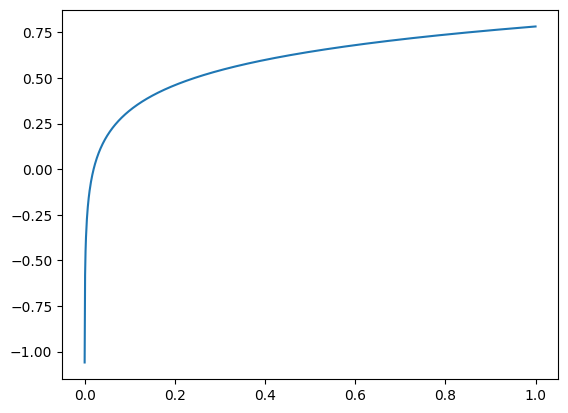

In [97]:
l = np.linspace(0.0001, 1, 1000)
plt.plot(l, np.log(50*l)/5)

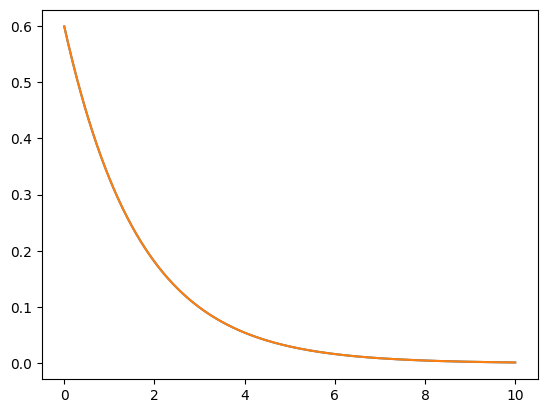

In [176]:
g = np.linspace(0,10,1000)
plt.plot(g, sp.stats.expon.pdf(g, loc=0, scale=1/S.lambda_m))
plt.plot(g, np.log(10)*y*10**(-y*g))

In [ ]:

for k in [1, 5, 10, 50]:
    plt.plot(g, np.log(k)*)

In [167]:
S.lambda_m

0.5991464547107982

In [171]:
y = np.log10(20)/5

0.5991464547107982


(array([3.0563e+04, 2.1347e+04, 1.4543e+04, 1.0267e+04, 7.1350e+03,
        4.9300e+03, 3.4630e+03, 2.3520e+03, 1.5960e+03, 1.1540e+03,
        8.1300e+02, 5.4300e+02, 3.9200e+02, 2.6300e+02, 1.9800e+02,
        1.2500e+02, 1.0500e+02, 6.3000e+01, 4.0000e+01, 3.4000e+01,
        1.6000e+01, 1.8000e+01, 1.2000e+01, 4.0000e+00, 9.0000e+00,
        6.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([1.06331661e-06, 6.09563584e-01, 1.21912610e+00, 1.82868863e+00,
        2.43825115e+00, 3.04781367e+00, 3.65737619e+00, 4.26693871e+00,
        4.87650123e+00, 5.48606375e+00, 6.09562627e+00, 6.70518879e+00,
        7.31475131e+00, 7.92431383e+00, 8.53387635e+00, 9.14343887e+00,
        9.75300139e+00, 1.03625639e+01, 1.09721264e+01, 1.15816890e+01,
        1.21912515e+01, 1.28008140e+01, 1.34103765e+01, 1.40199390e+01,
        1.46295016e+01, 1.52390641e+01, 1.58486266e+01, 1.64581891e+01,
        1.70677516e+01, 1.76773142e+01, 1.82868767e+01]),
 <BarContainer object of 30 

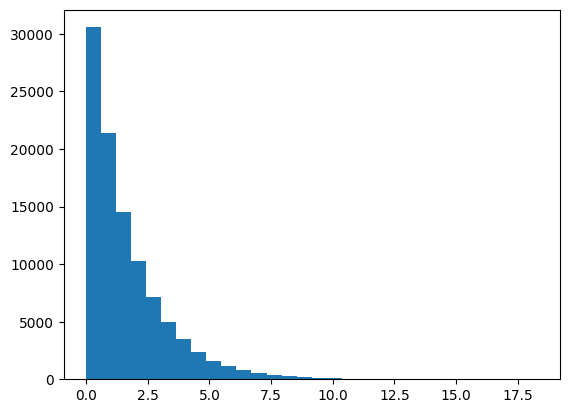

In [162]:
plt.hist(S.get_shock_magnitude(lambda_m=S.lambda_m, size=100000), bins=30)

In [164]:
np.exp(-10*S.lambda_m)

0.0025000000000000005

In [95]:
np.sum(S.get_shock_magnitude(lambda_m=S.lambda_m, size=10000) > 5) / 

0.044628710262841945


8010

In [166]:
x

0.5991464547107982

In [26]:
for e in E.graph.es['road_segments']:
    for s in e.segments:
        print(s.deterioration_table)

[[[0.9 0.1 0.  0. ]
  [0.  0.9 0.1 0. ]
  [0.  0.  0.9 0.1]
  [0.  0.  0.  1. ]]

 [[0.9 0.1 0.  0. ]
  [0.  0.9 0.1 0. ]
  [0.  0.  0.9 0.1]
  [0.  0.  0.  1. ]]

 [[1.  0.  0.  0. ]
  [0.9 0.1 0.  0. ]
  [0.8 0.2 0.  0. ]
  [0.7 0.2 0.1 0. ]]

 [[1.  0.  0.  0. ]
  [1.  0.  0.  0. ]
  [1.  0.  0.  0. ]
  [1.  0.  0.  0. ]]]
[[[0.9 0.1 0.  0. ]
  [0.  0.9 0.1 0. ]
  [0.  0.  0.9 0.1]
  [0.  0.  0.  1. ]]

 [[0.9 0.1 0.  0. ]
  [0.  0.9 0.1 0. ]
  [0.  0.  0.9 0.1]
  [0.  0.  0.  1. ]]

 [[1.  0.  0.  0. ]
  [0.9 0.1 0.  0. ]
  [0.8 0.2 0.  0. ]
  [0.7 0.2 0.1 0. ]]

 [[1.  0.  0.  0. ]
  [1.  0.  0.  0. ]
  [1.  0.  0.  0. ]
  [1.  0.  0.  0. ]]]
[[[0.9 0.1 0.  0. ]
  [0.  0.9 0.1 0. ]
  [0.  0.  0.9 0.1]
  [0.  0.  0.  1. ]]

 [[0.9 0.1 0.  0. ]
  [0.  0.9 0.1 0. ]
  [0.  0.  0.9 0.1]
  [0.  0.  0.  1. ]]

 [[1.  0.  0.  0. ]
  [0.9 0.1 0.  0. ]
  [0.8 0.2 0.  0. ]
  [0.7 0.2 0.1 0. ]]

 [[1.  0.  0.  0. ]
  [1.  0.  0.  0. ]
  [1.  0.  0.  0. ]
  [1.  0.  0.  0. ]]]
[[[0.9 0.1 0.  0

In [19]:
shock.add_equal_shock_to_deterioration_table(magn=500, det_table=dt[0,:])

[0 1 2 3]
[1 2 3 4]


array([[3.52236703e-05, 9.99964776e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.52236703e-05, 9.99964776e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.52236703e-05, 9.99964776e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])